<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/04_10_maze_solver_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maze solver

In [70]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
import algorithmic_complexity.mazebuilder as mb
import matplotlib.pyplot as plt

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [71]:
def drawMaze(maze, size=15):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(maze)
  ax.axis("off")

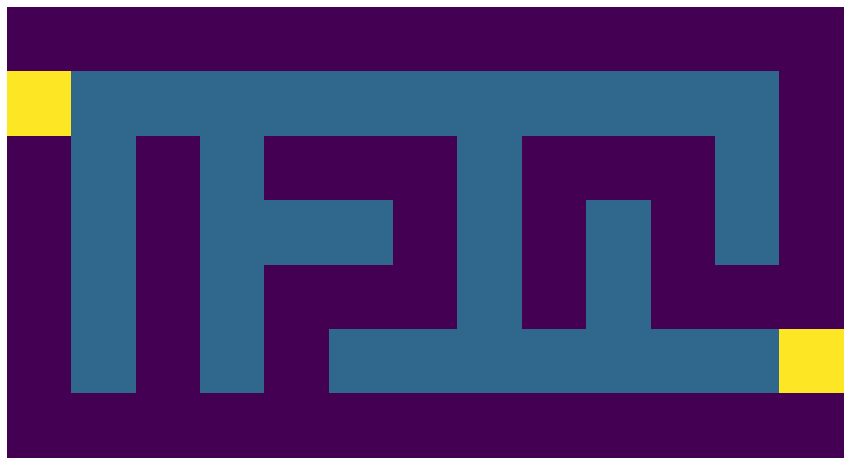

In [72]:
maze = mb.makeMaze(3, 6)
drawMaze(maze)

In [73]:
maze

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [74]:
type(maze)

numpy.ndarray

In [75]:
def mazeSolver(maze, row, col, rowF, colF):
  maze[row, col] = 3  # camino correcto (amarillo)
  if row == rowF and col == colF:
    #drawMaze(maze)
    return True

  nextSteps = [(row, col+1), (row+1, col), (row, col-1), (row-1, col)]
  for nextR, nextC in nextSteps:
    if maze[nextR, nextC] == 1 and mazeSolver(maze, nextR, nextC, rowF, colF):
      return True

  maze[row, col] = 2  # por aquí no era (verde)
  return False

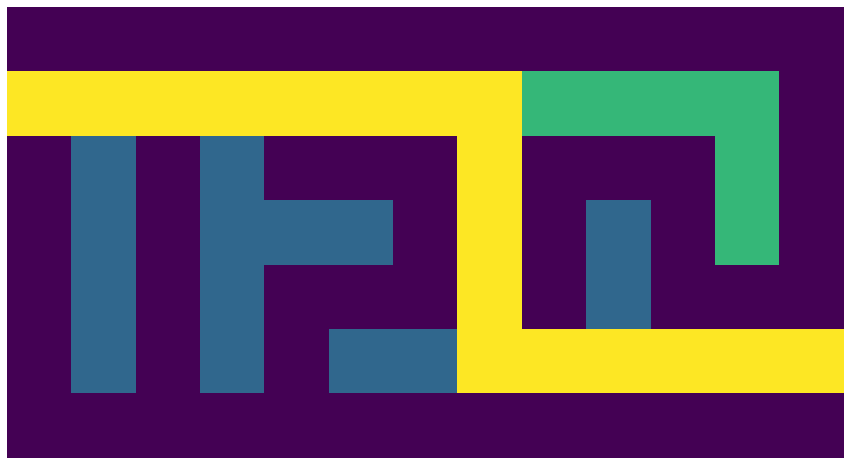

In [76]:
rows, cols = maze.shape
mazeSolver(maze, 1, 1, rows - 2, cols - 2)
drawMaze(maze)

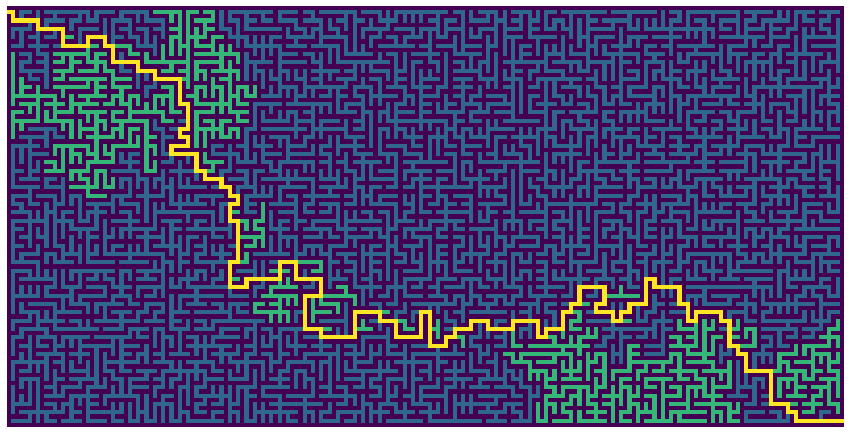

In [77]:
maze = mb.makeMaze(50, 100)
rows, cols = maze.shape
mazeSolver(maze, 1, 1, rows - 2, cols - 2)
drawMaze(maze)

## Ojo con la recursividad

In [78]:
maze = mb.makeMaze(100, 200)
print(maze.shape)
rows, cols = maze.shape
mazeSolver(maze, 1, 1, rows - 2, cols - 2)

(201, 401)


RecursionError: ignored

In [79]:
import pdb

def mazeSolver2(maze, rowI, colI, rowF, colF):
  stack = [(rowI, colI)]

  while stack:
    #pdb.set_trace()
    row, col = stack[-1]
    if row == rowF and col == colF:
      maze[row, col] = 3  # camino correcto (amarillo)
      #drawMaze(maze)
      return
    elif maze[row, col] == 1:
      maze[row, col] = 3  # camino correcto (amarillo)
      nextSteps = [(row, col+1), (row+1, col), (row, col-1), (row-1, col)]
      for nextR, nextC in nextSteps:
        if maze[nextR, nextC] == 1:
          stack.append((nextR, nextC))
    elif maze[row, col] == 3:
      maze[row, col] = 2
      stack.pop()

In [80]:
import numpy as np
base = mb.makeMaze(100, 200)

(201, 401)


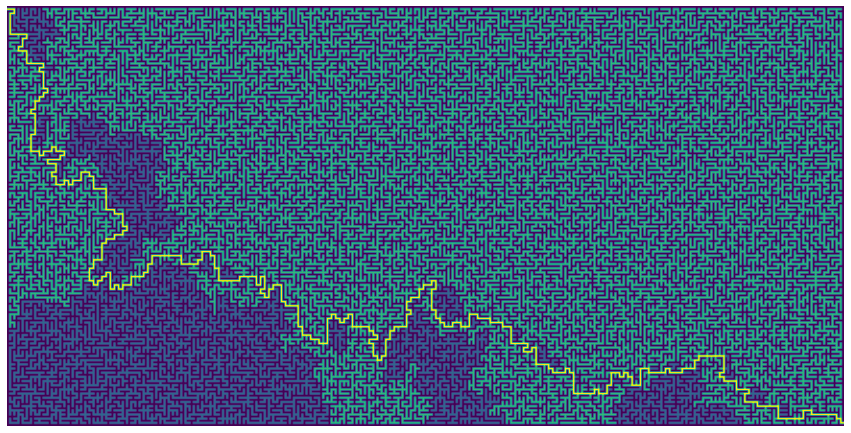

In [81]:
maze = np.copy(base)
print(maze.shape)
rows, cols = maze.shape
mazeSolver2(maze, 1, 1, rows - 2, cols - 2)
drawMaze(maze)

In [82]:
def mazeSolver3(maze, row, col, rowF, colF):
  while True:
    b = False
    nextSteps = [(row, col+1), (row+1, col), (row, col-1), (row-1, col)]
    for nextR, nextC in nextSteps:
      if maze[nextR, nextC] == 1:
        maze[row, col] = 3
        row = nextR
        col = nextC
        b = True
        break
    if row == rowF and col == colF:
      maze[row, col] = 3
      #drawMaze(maze)
      return
    if not b:
      for nextR, nextC in nextSteps:
        if maze[nextR, nextC] == 3:
          maze[row, col] = 2
          row = nextR
          col = nextC
          break

(201, 401)


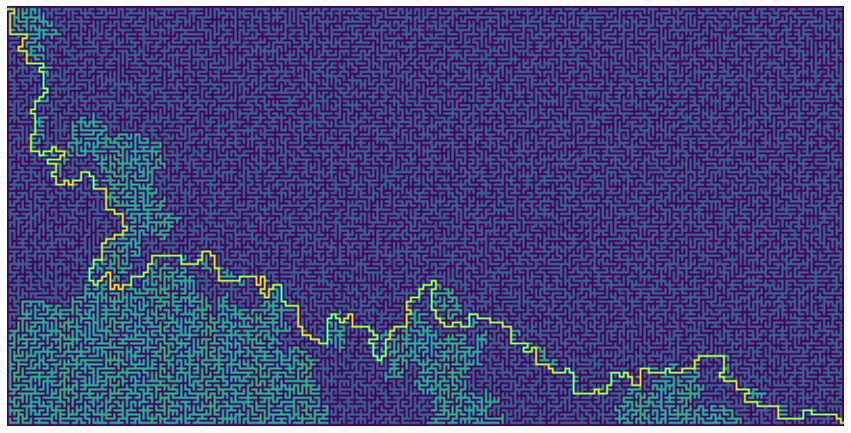

In [83]:
maze = np.copy(base)
print(maze.shape)
rows, cols = maze.shape
mazeSolver3(maze, 1, 1, rows - 2, cols - 2)
drawMaze(maze)

In [84]:
base = mb.makeMaze(50, 100)

In [85]:
def test1():
  maze = np.copy(base)
  rows, cols = maze.shape
  mazeSolver(maze, 1, 1, rows - 2, cols - 2)
  return
%timeit test1()

100 loops, best of 5: 12.5 ms per loop


In [86]:
def test2():
  maze = np.copy(base)
  rows, cols = maze.shape
  mazeSolver2(maze, 1, 1, rows - 2, cols - 2)
  return
%timeit test2()

100 loops, best of 5: 18.1 ms per loop


In [87]:
def test3():
  maze = np.copy(base)
  rows, cols = maze.shape
  mazeSolver3(maze, 1, 1, rows - 2, cols - 2)
  return
%timeit test3()

10 loops, best of 5: 21.5 ms per loop


# BFS Maze Solver

In [130]:
def bfsMazeSolver(maze, start, target):
  rows, cols = maze.shape
  n = rows * cols
  visited = np.zeros((rows, cols), dtype=int) # 0 not visited, 1 visited
  path = np.zeros((rows, cols, 2), dtype=int)
  path -= 1

  queue = [start]
  visited[start] = 1
  while queue:
    u = queue.pop(0)
    if u == target:
      break
    row, col = u
    neighbours = [(row, col+1), (row+1, col), (row, col-1), (row-1, col)]
    for r, c in neighbours:
      if maze[r, c] == 1 and not visited[r, c]:
        visited[r, c] = 1
        path[r, c] = u
        queue.append((r, c))

  pos = target
  while pos[0] != -1:
    maze[pos] = 3
    pos = tuple(path[pos])

  for i in range(rows):
    for j in range(cols):
      if path[i, j, 0] != -1 and maze[i, j] == 1:
        maze[i, j] = 2

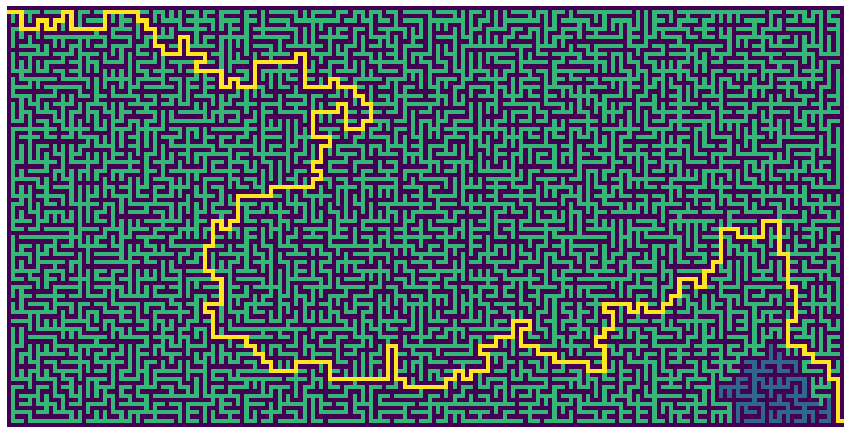

In [131]:
maze = np.copy(base)
rows, cols = maze.shape
bfsMazeSolver(maze, (1, 1), (rows - 2, cols - 2))
drawMaze(maze)

In [132]:
def test4():
  maze = np.copy(base)
  rows, cols = maze.shape
  bfsMazeSolver(maze, (1, 1), (rows - 2, cols - 2))
  return
%timeit test4()

10 loops, best of 5: 51 ms per loop


In [ ]:
0,0   0,1   0,2   0,3
1,0   1,1   1,2   1,3
2,0   2,1   2,2   2,3


0     1     2     3
4     5     6     7
8     9     10    11

cols = 4

1*4 + 2 = 6
2*4 + 3 = 11

9 // 4 = 2
9 % 4  = 1